In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.formula.api import glm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey as bgtest
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
import seaborn as sns
import gretltests
import matplotlib.pyplot as plt
import numpy as np
import augmentdata
from statsmodels.tools.tools import add_constant
plt.rcParams['figure.figsize'] = [10, 5]

# Session 18 Slides

In [2]:
data=pd.read_csv('data13-1.csv')

In [3]:
data

obs  YEAR     GDP    CONS    INV  EXPORTS  IMPORTS  GOVEXP  GOVREC  \
0   1959  1959  1928.8  1178.9  296.4     73.8     95.6   475.3   128.8   
1   1960  1960  1970.8  1210.8  290.8     88.4     96.1   476.9   138.8   
2   1961  1961  2023.8  1238.4  289.4     89.9     95.3   501.5   144.1   
3   1962  1962  2128.1  1293.3  321.2     95.0    105.5   524.2   155.8   
4   1963  1963  2215.6  1341.9  343.3    101.8    107.7   536.3   167.5   
5   1964  1964  2340.6  1417.2  371.8    115.4    112.9   549.1   172.9   
6   1965  1965  2470.5  1497.0  413.0    118.1    124.5   566.9   187.0   
7   1966  1966  2616.2  1573.8  438.0    125.7    143.7   622.4   210.7   
8   1967  1967  2685.2  1622.4  418.6    130.0    153.7   667.9   226.4   
9   1968  1968  2796.9  1707.5  440.1    140.2    177.7   686.8   260.9   
10  1969  1969  2873.0  1771.2  461.3    147.8    189.2   682.0   294.0   
11  1970  1970  2873.9  1813.5  429.7    161.3    196.4   665.8   299.8   
12  1971  1971  2955.9  1873.7  475.7    161.9    207.8   652.4   318.9   
13  1972  1972  3107.1  1978.4  532.2    173.7    230.2   653.0   364.2   
14  1973  1973  3268.6  2066.7  591.7    210.3    244.4   644.2   408.5   
15  1974  1974  3248.1  2053.8  543.0    234.4    238.4   655.4   450.7   
16  1975  1975  3221.7  2097.5  437.6    232.9    209.8   663.5   465.8   
17  1976  1976  3380.8  2207.3  520.6    243.4    249.7   659.2   532.6   
18  1977  1977  3533.3  2296.6  600.4    246.9    274.7   664.1   598.4   
19  1978  1978  3703.5  2391.8  664.6    270.2    300.1   677.0   673.2   
20  1979  1979  3796.8  2448.4  669.7    293.5    304.1   689.3   754.7   
21  1980  1980  3776.3  2447.1  594.4    320.5    289.9   704.2   825.7   
22  1981  1981  3843.1  2476.9  631.1    326.1    304.1   713.2   941.9   
23  1982  1982  3760.3  2503.7  540.5    296.7    304.1   723.6   960.5   
24  1983  1983  3906.6  2619.4  599.5    285.9    342.1   743.8  1016.4   
25  1984  1984  4148.5  2746.1  757.5    305.7    427.7   766.9  1123.6   
26  1985  1985  4279.8  2865.8  745.9    309.2    454.6   813.4  1217.0   
27  1986  1986  4404.5  2969.1  735.1    329.6    484.7   855.4  1290.8   
28  1987  1987  4539.9  3052.2  749.3    364.0    507.1   881.5  1405.2   
29  1988  1988  4718.6  3162.4  773.4    421.6    525.7   886.8  1492.4   
30  1989  1989  4838.0  3223.3  784.0    471.8    545.4   904.4  1622.6   
31  1990  1990  4897.3  3272.6  746.8    510.5    565.1   932.6  1709.1   
32  1991  1991  4861.4  3258.6  675.7    543.4    562.5   946.3  1755.2   
33  1992  1992  4986.3  3341.8  732.9    578.0    611.6   945.2  1849.4   
34  1993  1993  5132.7  3452.5  820.9    596.4    675.7   938.6  1969.1   

    MONYSUP     Pt     rt      POP  
0     297.8   25.6   4.38  177.830  
1     312.3   26.0   4.41  180.671  
2     335.5   26.3   4.35  183.691  
3     362.7   26.9   4.33  186.538  
4     393.2   27.2   4.26  189.242  
5     424.8   27.7   4.40  191.889  
6     459.3   28.4   4.49  194.303  
7     480.0   29.4   5.13  196.560  
8     524.3   30.3   5.51  198.712  
9     566.3   31.8   6.18  200.706  
10    589.5   33.4   7.03  202.677  
11    628.0   35.2   8.04  205.052  
12    712.6   37.1   7.39  207.661  
13    805.1   38.8   7.21  209.896  
14    860.9   41.3   7.44  211.909  
15    908.4   44.9   8.57  213.854  
16   1023.1   49.2   8.83  215.973  
17   1163.5   52.3   8.43  218.035  
18   1286.4   55.9   8.02  220.239  
19   1388.5   60.3   8.73  222.585  
20   1496.4   65.5   9.63  225.055  
21   1629.2   71.7  11.94  227.726  
22   1792.6   78.9  14.17  229.966  
23   1952.7   83.8  13.79  232.188  
24   2186.5   87.2  12.04  234.307  
25   2376.0   91.0  12.71  236.348  
26   2572.4   94.4  11.37  238.466  
27   2816.1   96.9   9.02  240.651  
28   2917.2  100.0   9.38  242.804  
29   3078.2  103.9   9.71  245.021  
30   3233.3  108.5   9.26  247.342  
31   3345.5  113.3   9.32  249.900  
32   3445.8  117.7   8.77  252.671  
33   3494.8  121.1   8.14  255.462  
34   3551

In [4]:
#data['GDPpercap']=data.GDP/data.POP
data['GDPpercap']=data.GDP/data.POP
data['CONSpercap']=data.CONS/data.POP
data['GDPpercapmillons']=data.GDPpercap*1000
data['time']=np.arange(1,len(data)+1)

In [5]:
data['l_GDPpercap']=np.log(data.GDP/data.POP)
data['l_CONSpercap']=np.log(data.CONS/data.POP)
data['l_GDPpercapmillons']=np.log(data.GDPpercap*1000)
data['l_time']=np.arange(1,len(data)+1)

In [6]:
mod0=ols('CONSpercap~GDPpercap+time',data=data).fit()
mod0_=ols('CONSpercap~GDPpercapmillons+time',data).fit()
print(mod0.summary())
print(mod0_.summary())

                            OLS Regression Results                            
Dep. Variable:             CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6251.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.26e-42
Time:                        13:03:58   Log-Likelihood:                 28.581
No. Observations:                  35   AIC:                            -51.16
Df Residuals:                      32   BIC:                            -46.50
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2461      0.519      2.402      0.0

In [7]:
mod1=ols('l_CONSpercap~l_GDPpercap+time',data=data).fit()
mod1_=ols('l_CONSpercap~l_GDPpercapmillons+time',data).fit()
print(mod1.summary())
print(mod1_.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     5033.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.04e-40
Time:                        13:03:58   Log-Likelihood:                 104.21
No. Observations:                  35   AIC:                            -202.4
Df Residuals:                      32   BIC:                            -197.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.2286      0.154     -1.487      

In [8]:
mod2=ols('l_CONSpercap~l_GDPpercap+time+l_GDPpercap*time',data=data).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4002.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.36e-40
Time:                        13:03:58   Log-Likelihood:                 107.84
No. Observations:                  35   AIC:                            -207.7
Df Residuals:                      31   BIC:                            -201.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.0527      0.155  

In [9]:
mod3=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)+l_GDPpercap*time',data=data).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3744.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           8.27e-40
Time:                        13:03:58   Log-Likelihood:                 116.77
No. Observations:                  35   AIC:                            -221.5
Df Residuals:                      29   BIC:                            -212.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               7.2874    

In [10]:
restrictions='(I(l_GDPpercap ** 2)=0),(I(time ** 2) =0)'
print(mod3.f_test(restrictions))
mod3b=ols('l_CONSpercap~l_GDPpercap+time+l_GDPpercap*time',data=data).fit()
print(mod3b.summary())

print('aic comparison',mod3.aic,mod3b.aic)
print('bic comparison',mod3.bic,mod3b.bic)


<F test: F=9.646338726967521, p=0.0006144582035865358, df_denom=29, df_num=2>
                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4002.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           3.36e-40
Time:                        13:03:59   Log-Likelihood:                 107.84
No. Observations:                  35   AIC:                            -207.7
Df Residuals:                      31   BIC:                            -201.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [11]:
restrictions='(l_GDPpercap:time=0)'
print(mod3.f_test(restrictions))
mod3c=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)',data=data).fit()
print(mod3c.summary())

print('aic comparison',mod3.aic,mod3c.aic)
print('bic comparison',mod3.bic,mod3c.bic)


<F test: F=0.12209966232260869, p=0.7292930409822607, df_denom=29, df_num=1>
                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4821.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.18e-41
Time:                        13:03:59   Log-Likelihood:                 116.70
No. Observations:                  35   AIC:                            -223.4
Df Residuals:                      30   BIC:                            -215.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [12]:

mod4=ols('l_CONSpercap~l_GDPpercap+time+I(time**2)+I(l_GDPpercap**2)',data=data).fit()
print(mod4.summary())

b=mod4.params

                            OLS Regression Results                            
Dep. Variable:           l_CONSpercap   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4821.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           1.18e-41
Time:                        13:03:59   Log-Likelihood:                 116.70
No. Observations:                  35   AIC:                            -223.4
Df Residuals:                      30   BIC:                            -215.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               4.0089    

In [13]:
b.l_GDPpercap+2*b['I(l_GDPpercap ** 2)']*data.l_GDPpercap.mean()

0.7603162828391072

# Session 18 Interactive

In [14]:
ceosal1=woo.data('ceosal1')
woo.data('ceosal1',description=True)

name of dataset: ceosal1
no of variables: 12
no of observations: 209

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| salary   | 1990 salary, thousands $      |
| pcsalary | % change salary, 89-90        |
| sales    | 1990 firm sales, millions $   |
| roe      | return on equity, 88-90 avg   |
| pcroe    | % change roe, 88-90           |
| ros      | return on firm's stock, 88-90 |
| indus    | =1 if industrial firm         |
| finance  | =1 if financial firm          |
| consprod | =1 if consumer product firm   |
| utility  | =1 if transport. or utilties  |
| lsalary  | natural log of salary         |
| lsales   | natural log of sales          |
+----------+-------------------------------+

I took a random sample of data reported in the May 6, 1991 issue of
Businessweek.


In [15]:
ceosal1['lsalary']=np.log(ceosal1.salary)
ceosal1['lsales_']=np.log(ceosal1.sales)-np.log(ceosal1.sales).mean()
ceosal1['lroe_']=np.log(ceosal1.roe)-np.log(ceosal1.roe).mean()
ceosal1['lsales_sq']=ceosal1.lsales_**2
ceosal1['lroe_sq']=ceosal1.lroe_**2
ceosal1['lsales_lroe']=ceosal1.lroe_*ceosal1.lsales_

In [16]:
ceosal1a=ceosal1.iloc[0:159,:]
ceosal1b=ceosal1.iloc[159:,:]
ceosal1a

salary  pcsalary         sales        roe       pcroe  ros  indus  \
0      1095        20  27595.000000  14.100000  106.400002  191      1   
1      1001        32   9958.000000  10.900000  -30.600000   13      1   
2      1122         9   6125.899902  23.500000  -16.299999   14      1   
3       578        -9  16246.000000   5.900000  -25.700001  -21      1   
4      1368         7  21783.199219  13.800000   -3.000000   56      1   
..      ...       ...           ...        ...         ...  ...    ...   
154    1568        47   5181.399902  28.200001  -19.100000   55      0   
155     995        15   1323.000000  15.400000   74.599998  195      0   
156    1077       -16   5296.000000  20.000000   27.500000   36      0   
157    1161         9   7177.000000  42.200001   -2.800000   68      0   
158    1401         1  12183.500000  19.600000   -2.100000   93      0   

     finance  consprod  utility   lsalary     lsales   lsales_     lroe_  \
0          0         0        0  6.998510  10.225389  1.933125 -0.074126   
1          0         0        0  6.908755   9.206132  0.913867 -0.331538   
2          0         0        0  7.022868   8.720281  0.428016  0.436700   
3          0         0        0  6.359574   9.695602  1.403337 -0.945348   
4          0         0        0  7.221105   9.988894  1.696629 -0.095632   
..       ...       ...      ...       ...        ...       ...       ...   
154        0         1        0  7.357556   8.552831  0.260566  0.619021   
155        0         1        0  6.902743   7.187657 -1.104608  0.014067   
156        0         1        0  6.981935   8.574707  0.282442  0.275431   
157        0         1        0  7.057037   8.878636  0.586372  1.022119   
158        0         1        0  7.244942   9.407838  1.115573  0.255229   

     lsales_sq   lroe_sq  lsales_lroe  
0     3.736973  0.005495    -0.143295  
1     0.835152  0.109918    -0.302982  
2     0.183198  0.190707     0.186914  
3     1.969355  0.893684    -1.326643  
4     2.878552  0.009146    -0.162252  
..         ...       ...          ...  
154   0.067895  0.383187     0.161296  
155   1.220158  0.000198    -0.015538  
156   0.079774  0.075862     0.077793  
157   0.343832  1.044728     0.599342  
158   1.244503  0.065142     0.284726  

[159 rows x 17 columns]

In [17]:
f='lsalary~lsales_+lroe_+lsales_sq+lroe_sq+lsales_lroe+indus+finance+consprod'

In [18]:
mod5=ols(f,data=ceosal1a).fit()
print(mod5.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     11.83
Date:                Mon, 08 Apr 2024   Prob (F-statistic):           5.44e-13
Time:                        13:04:00   Log-Likelihood:                -69.812
No. Observations:                 159   AIC:                             157.6
Df Residuals:                     150   BIC:                             185.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1427      0.174     41.056      

In [19]:
restrictions='(indus=0),(finance=0),(consprod=0),(lsales_lroe=0)'
print(mod5.f_test(restrictions))
mod6=glm(f,data=ceosal1a)
out=mod6.fit_constrained(restrictions)
print(out.summary())
print('aic and bic',out.aic,out.bic_llf)

<F test: F=0.9174612043694621, p=0.45548195835583893, df_denom=150, df_num=4>
                 Generalized Linear Model Regression Results                  
Dep. Variable:                lsalary   No. Observations:                  159
Model:                            GLM   Df Residuals:                      154
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                         0.14903
Method:                          IRLS   Log-Likelihood:                -71.734
Date:                Mon, 08 Apr 2024   Deviance:                       22.950
Time:                        13:04:00   Pearson chi2:                     23.0
No. Iterations:                     1   Pseudo R-squ. (CS):             0.4368
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------

In [20]:
b=out.params
ind=list(b.index)
ind[0]='const'
b.index=ind
ceosal1b=add_constant(ceosal1b,prepend=True)
forc=ceosal1b[list(b.index)]@b
ceosal1b['forecast']=forc

<Axes: >

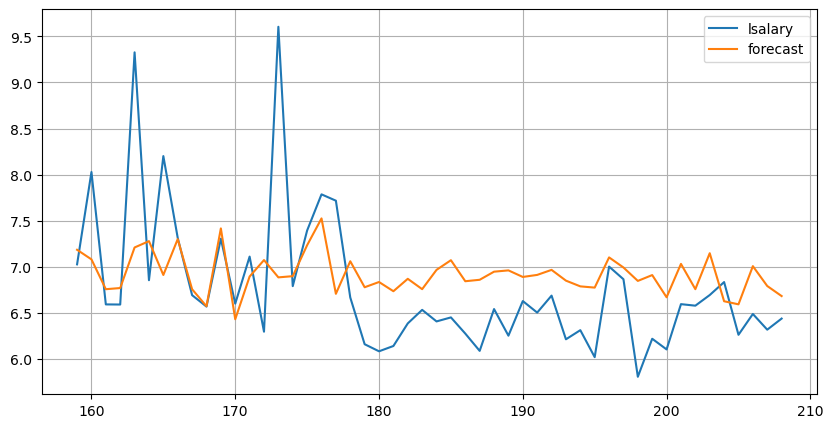

In [21]:
ceosal1b[['lsalary','forecast']].plot(grid=True)

<Axes: >

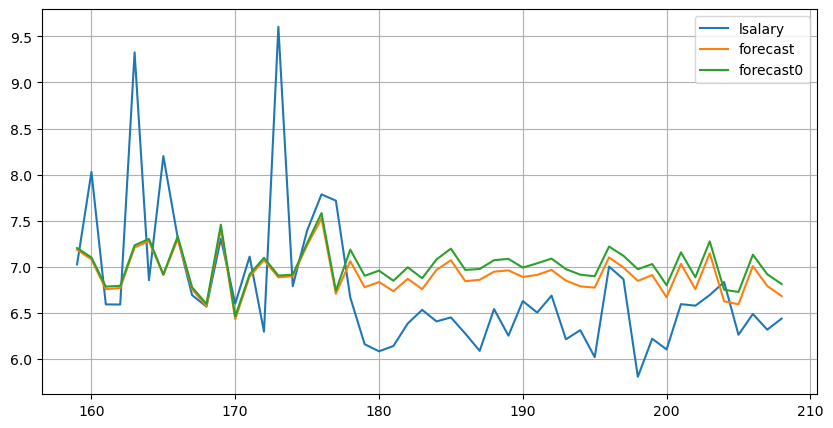

In [22]:
b0=mod5.params
ind=list(b0.index)
ind[0]='const'
b0.index=ind
#ceosal1b=add_constant(ceosal1b,prepend=True)
forc0=ceosal1b[list(b0.index)]@b0
ceosal1b['forecast0']=forc0
ceosal1b[['lsalary','forecast','forecast0']].plot(grid=True)

In [23]:
error=ceosal1b.lsalary-forc
error0=ceosal1b.lsalary-forc0
ceosal1b['e']=error
ceosal1b['e0']=error0


In [24]:
e=ceosal1b[['e','e0']].iloc[-50:,:]
df=pd.DataFrame([e.mean(),np.sqrt((e**2).mean()),np.abs(e).mean()])
df.index=['Mean Error','Root Mean Squared Error','Mean Absolute Error']
#I will just do a few of the measures
df

e        e0
Mean Error              -0.151021 -0.237384
Root Mean Squared Error  0.708166  0.759576
Mean Absolute Error      0.515315  0.586611

In [25]:
f6='lsalary~lsales_+lroe_+lsales_sq+lroe_sq'
mod6=ols(f6,data=ceosal1b.iloc[-50:,:]).fit()
print(mod6.summary())

                            OLS Regression Results                            
Dep. Variable:                lsalary   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     4.016
Date:                Mon, 08 Apr 2024   Prob (F-statistic):            0.00720
Time:                        13:04:01   Log-Likelihood:                -48.816
No. Observations:                  50   AIC:                             107.6
Df Residuals:                      45   BIC:                             117.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8524      0.139     49.398      0.0

In [26]:
#You can remove the intercept as follows, not sure why there is a very small difference with gretl
f6='lsalary~forecast-1'
mod6=ols(f6,data=ceosal1b.iloc[-50:,:]).fit()
print(mod6.summary())

                                 OLS Regression Results                                
Dep. Variable:                lsalary   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4689.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):                    2.59e-50
Time:                        13:04:02   Log-Likelihood:                         -52.570
No. Observations:                  50   AIC:                                      107.1
Df Residuals:                      49   BIC:                                      109.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [27]:
#The centered version of r-squared is
1-mod6.ssr/mod6.centered_tss

0.1436728868955326